In [1]:
# Ignoring the warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing necessary Libraries for Data analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",100)

In [3]:
# Importing Statsmodels and SkiKit libraries to perform multi linear regression analysis

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Reading the dataset and storing the same in "bike"

bike=pd.read_csv("C:/Users/vinee/Desktop/MLR Assignment/day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.shape

(730, 16)

In [7]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


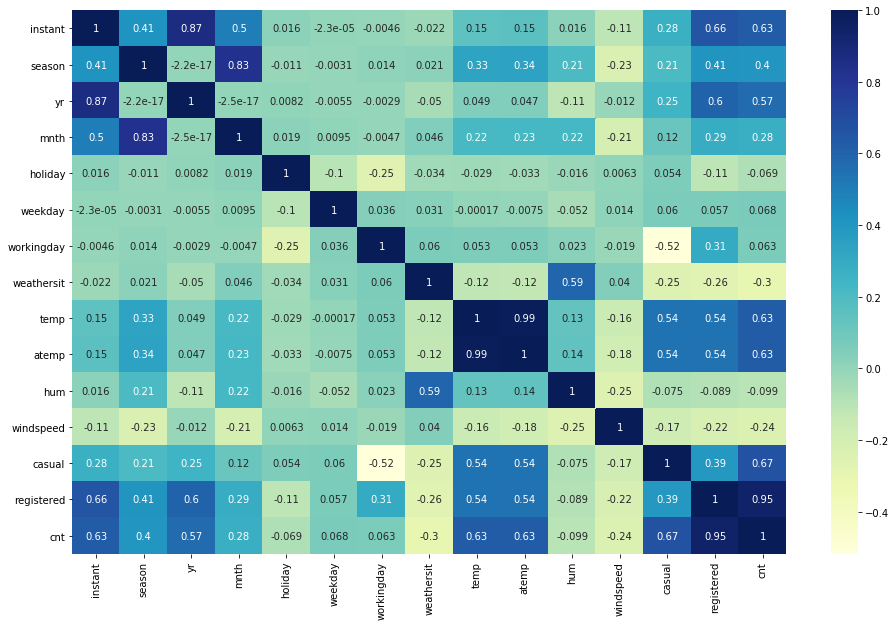

In [8]:
# Visualizing the corr heatmap of the dataset

plt.figure(figsize=(16,10))
sns.heatmap(bike.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [9]:
# Sorting by descending order, the corr of all the feature variables w.r.t "cnt" target variable

bike.corr()["cnt"].sort_values(ascending=False)

cnt           1.000000
registered    0.945411
casual        0.672123
atemp         0.630685
instant       0.629896
temp          0.627044
yr            0.569728
season        0.404584
mnth          0.278191
weekday       0.067534
workingday    0.062542
holiday      -0.068764
hum          -0.098543
windspeed    -0.235132
weathersit   -0.295929
Name: cnt, dtype: float64

In [10]:
## Dropping the columns not necessary for our analysis

bike=bike.drop(columns=["registered","casual","instant","dteday"],axis=1)

In [11]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


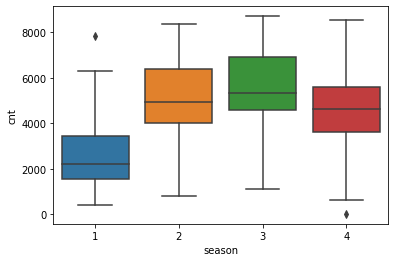

In [12]:
sns.boxplot(x="season", y="cnt", data=bike)

## Clearly, summer and fall has seen high demand for bike rentals. Therefore season could be an important predictor for bike rentals.

## Spring season saw the lowest demand and therefore, the slope coefficient of spring season in Multi LR model should be negative.

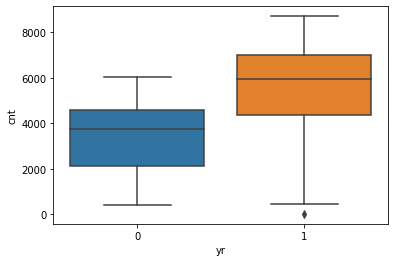

In [13]:
sns.boxplot(x="yr", y="cnt", data=bike) 

### We can see above that yr is an important feature and can explain a lot of variation in bike rental demand. Therefore it should be considered for analysis.

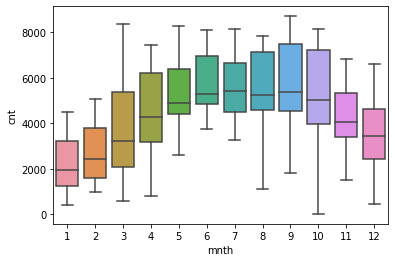

In [14]:
sns.boxplot(x="mnth", y="cnt", data=bike) 

In [15]:
bike.groupby("mnth")["cnt"].mean().sort_values()

mnth
1     2176.338710
2     2669.964286
12    3403.806452
3     3692.258065
11    4247.183333
4     4484.900000
10    5199.225806
5     5349.774194
7     5563.677419
8     5664.419355
9     5766.516667
6     5772.366667
Name: cnt, dtype: float64

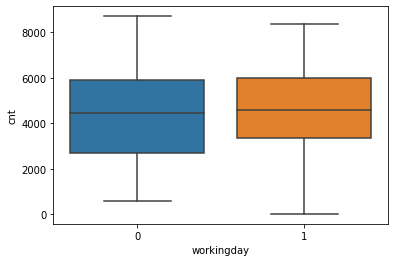

In [16]:
sns.boxplot(x="workingday", y="cnt", data=bike) 

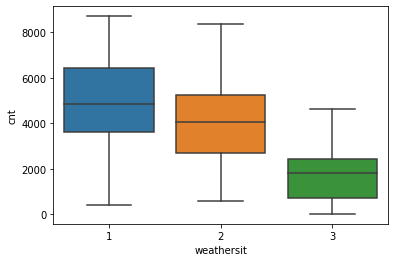

In [17]:
sns.boxplot(x="weathersit", y="cnt", data=bike) 

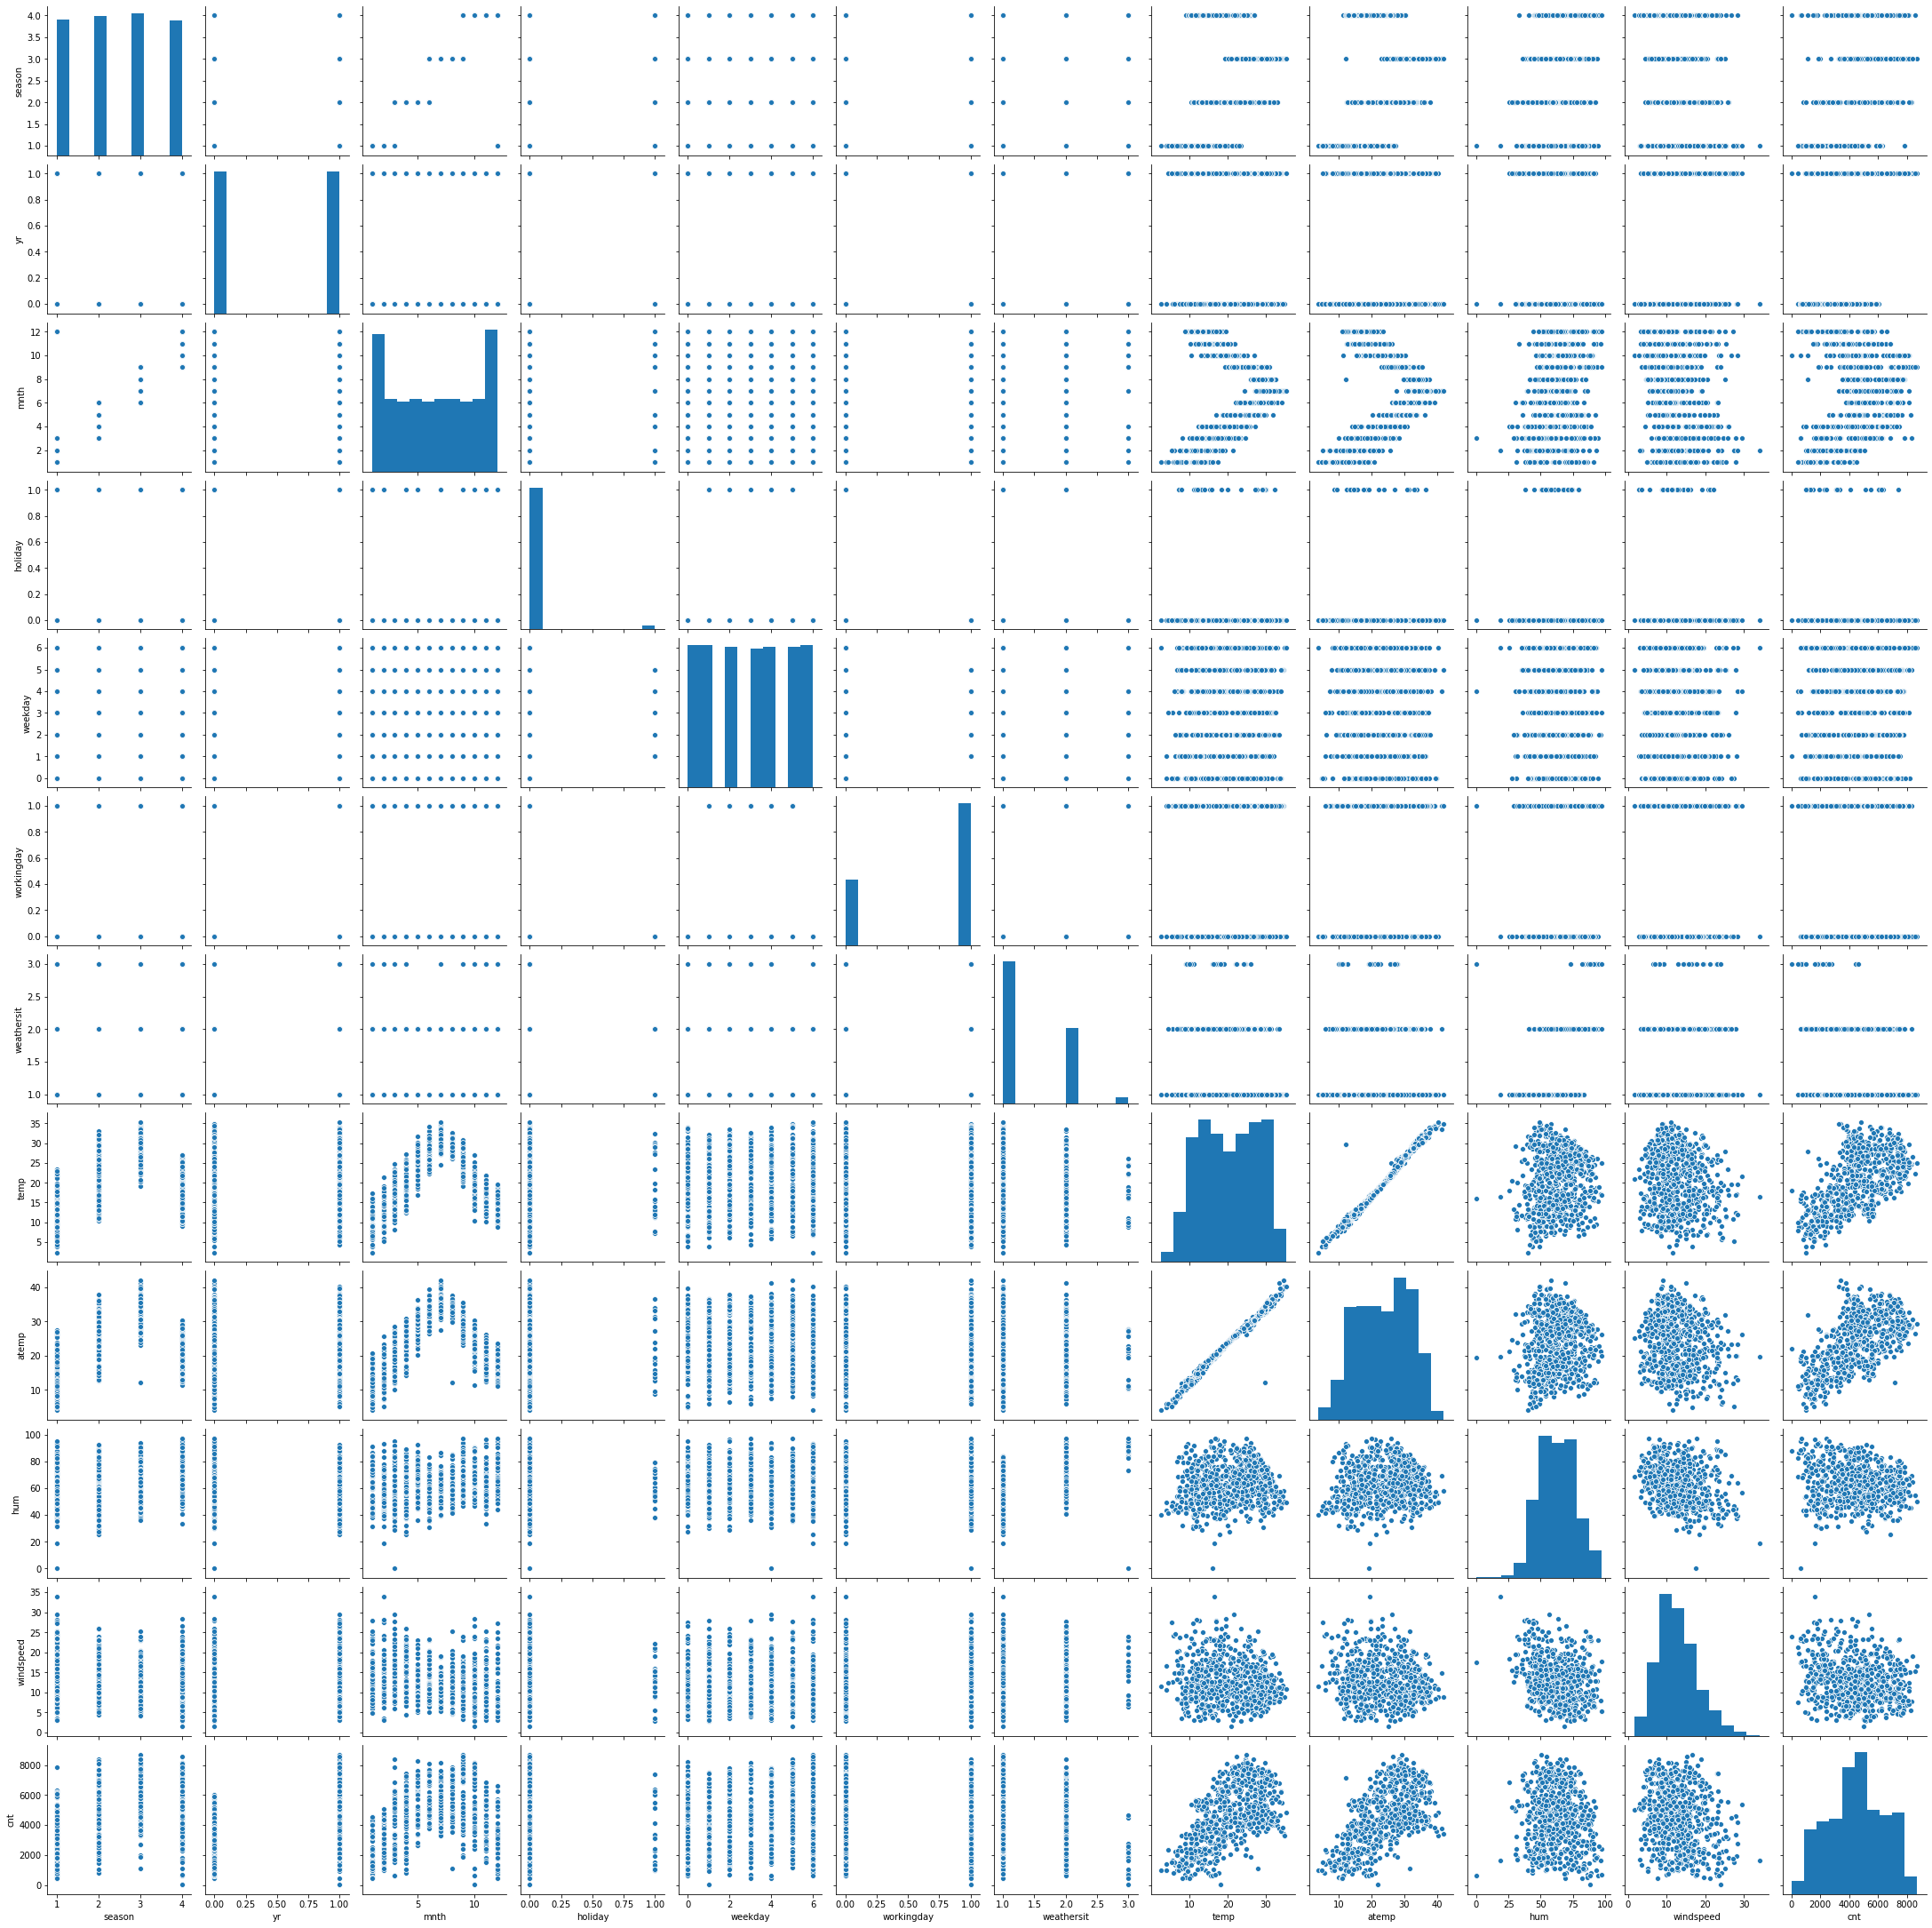

In [18]:
# Conducting a pairplot to see how "cnt" as a target variable behaves with all its predictors

sns.pairplot(bike) 

In [19]:
bike["temp"].corr(bike["atemp"])

0.9916961786905644

In [20]:
bike=bike.drop(columns=["atemp"],axis=1)   #temp and atemp are highly corelated and keeping both will induce multicollinearity
bike.head()          

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


## The dichotomous categorical variables present in our analysis are- yr, workingday and holiday. 
## Weathersit is not dichotomous as it has more than 2 levels amd hence we need to create dummy variables out of it.
## season is not dichotomous as it has more than 2 levels amd hence we need to create dummy variables out of it.
## month is not dichotomous as it has more than 2 levels amd hence we need to create dummy variables out of it.
## weekday is not dichotomous as it has more than 2 levels amd hence we need to create dummy variables out of it.

In [21]:
weather_conditions= pd.get_dummies(bike["weathersit"], drop_first=True)
weather_conditions.rename(columns= {2:"misty_and_cloudy",3:"lightrains_lightsnow_thunderstorms_clouds"}, inplace =True)
bike= pd.concat([bike,weather_conditions], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,misty_and_cloudy,lightrains_lightsnow_thunderstorms_clouds
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,0,0
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,0,0
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,0,0


In [22]:
bike_seasons= pd.get_dummies(bike["season"], drop_first=True)
bike_seasons.rename(columns= {2:"summer_season",3:"fall_season",4:"winter_season"}, inplace =True)
bike= pd.concat([bike,bike_seasons], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,misty_and_cloudy,lightrains_lightsnow_thunderstorms_clouds,summer_season,fall_season,winter_season
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0


In [23]:
bike_weekdays= pd.get_dummies(bike["weekday"], drop_first=True)
bike_weekdays.rename(columns= {1:"monday",2:"tuesday",3:"wednesday",4:"thursday",5:"friday",6:"saturday"}, inplace =True)
bike= pd.concat([bike,bike_weekdays], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,misty_and_cloudy,lightrains_lightsnow_thunderstorms_clouds,summer_season,fall_season,winter_season,monday,tuesday,wednesday,thursday,friday,saturday
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,1,0,0,0


In [24]:
bike_demand_by_month= pd.get_dummies(bike["mnth"], drop_first=True)
bike_demand_by_month.rename(columns= {1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"}, inplace =True)
bike= pd.concat([bike,bike_demand_by_month], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,misty_and_cloudy,lightrains_lightsnow_thunderstorms_clouds,summer_season,fall_season,winter_season,monday,tuesday,wednesday,thursday,friday,saturday,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


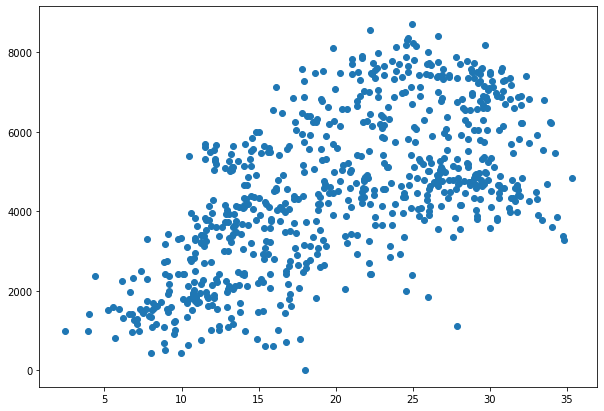

In [25]:
# As we can see that there is a strong linear relationship between temp and cnt, i.e with rise in temp, bike rental
# demand goes up.

# However, at some temp, we could see that the demand is rediculously low, close to zero, which is not required in our 
# analysis.

plt.figure(figsize=(10,7))
plt.scatter(bike["temp"],bike["cnt"])

plt.show()

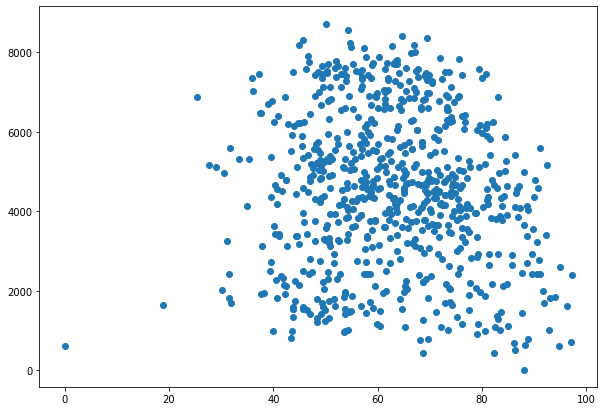

In [26]:
plt.figure(figsize=(10,7))                   
plt.scatter(bike["hum"],bike["cnt"])

plt.show()

In [27]:
# As we can see between temp scale of 15 to 20, the bike rental demand of 1115 and 1842 are rediculously low, and sd not be
# considered in LR model, because it will have an impact on the best fit.

bike.loc[(bike["temp"]>15) & (bike["temp"]<20),["temp","cnt"]].sort_values(by="cnt").head()

,temp,cnt
666,18.040000,22
64,15.437402,605
68,15.952731,623
340,16.810000,705
105,17.664153,795


In [28]:
# As we can see between temp scale of 25 to 30, the bike rental demand of 1115 and 1842 are rediculously low, and sd not be
# considered in LR model, because it will have an impact on the best fit.

bike.loc[(bike["temp"]>25) & (bike["temp"]<30),["temp","cnt"]].sort_values(by="cnt").head()

,temp,cnt
238,27.880000,1115
250,25.990433,1842
247,27.606653,3351
236,28.050847,3542
251,26.650000,3544


In [29]:
# dropping the outliers in the cnt vs temp data...

bike.drop([238,250,666], inplace=True)
bike.shape

(727, 33)

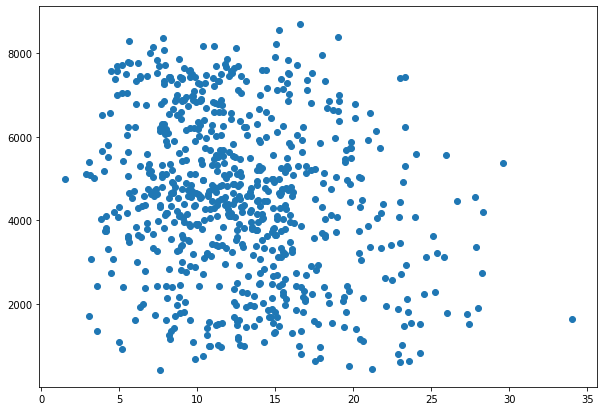

In [30]:
plt.figure(figsize=(10,7))                   # As such, there are no substantial outliers in the feature windspeed, and if 
plt.scatter(bike["windspeed"],bike["cnt"])   # there is any, it will be taken care of, during scaling.

plt.show()

In [31]:
bike.loc[(bike["hum"]>-10) & (bike["hum"]<22),["hum","cnt"]].sort_values(by="cnt").head()

,hum,cnt
68,0.0000,623
49,18.7917,1635


In [32]:
## From the above cell, humidity as zero is not possible and should be removed from the data.

bike.drop(68, inplace=True)
bike.shape

(726, 33)

In [33]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,misty_and_cloudy,lightrains_lightsnow_thunderstorms_clouds,summer_season,fall_season,winter_season,monday,tuesday,wednesday,thursday,friday,saturday,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
bike=bike.drop(columns=["season","mnth","weekday","weathersit"],axis=1)

In [35]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,misty_and_cloudy,lightrains_lightsnow_thunderstorms_clouds,summer_season,fall_season,winter_season,monday,tuesday,wednesday,thursday,friday,saturday,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Splitting the Dataset into Training and Testing Sets

In [36]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bike_train,bike_test= train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)

In [37]:
bike_train.shape

(508, 29)

In [38]:
bike_test.shape

(218, 29)

In [39]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,misty_and_cloudy,lightrains_lightsnow_thunderstorms_clouds,summer_season,fall_season,winter_season,monday,tuesday,wednesday,thursday,friday,saturday,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,0.501969,0.025591,0.663386,20.068965,63.044419,12.777249,4531.649606,0.356299,0.023622,0.228346,0.257874,0.261811,0.135827,0.131890,0.127953,0.149606,0.143701,0.157480,0.070866,0.090551,0.068898,0.086614,0.070866,0.076772,0.086614,0.088583,0.082677,0.094488,0.092520
std,0.500489,0.158066,0.473017,7.370640,14.260672,5.248634,1971.781219,0.479377,0.152018,0.420181,0.437896,0.440054,0.342942,0.338704,0.334366,0.357037,0.351132,0.364612,0.256854,0.287253,0.253530,0.281546,0.256854,0.266491,0.281546,0.284421,0.275665,0.292795,0.290044
min,0.000000,0.000000,0.000000,2.424346,18.791700,3.042356,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.914375,51.906275,9.041918,3110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,19.867924,63.312500,12.187735,4566.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.479150,15.699005,6043.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Rescaling the features

In [40]:
scaler= MinMaxScaler()

In [41]:
num_vars=["temp","windspeed","hum","cnt"]
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,misty_and_cloudy,lightrains_lightsnow_thunderstorms_clouds,summer_season,fall_season,winter_season,monday,tuesday,wednesday,thursday,friday,saturday,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
423,1,0,1,0.373860,0.265002,0.320327,0.474707,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.376526,0.660843,0.164795,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
546,1,0,0,0.942889,0.421667,0.266463,0.615719,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
112,0,0,0,0.499503,0.892194,0.401071,0.435229,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
579,1,0,1,0.880586,0.579394,0.368752,0.814198,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [42]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,misty_and_cloudy,lightrains_lightsnow_thunderstorms_clouds,summer_season,fall_season,winter_season,monday,tuesday,wednesday,thursday,friday,saturday,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,0.501969,0.025591,0.663386,0.536245,0.564029,0.314458,0.495068,0.356299,0.023622,0.228346,0.257874,0.261811,0.135827,0.131890,0.127953,0.149606,0.143701,0.157480,0.070866,0.090551,0.068898,0.086614,0.070866,0.076772,0.086614,0.088583,0.082677,0.094488,0.092520
std,0.500489,0.158066,0.473017,0.224004,0.181761,0.169542,0.238052,0.479377,0.152018,0.420181,0.437896,0.440054,0.342942,0.338704,0.334366,0.357037,0.351132,0.364612,0.256854,0.287253,0.253530,0.281546,0.256854,0.266491,0.281546,0.284421,0.275665,0.292795,0.290044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.349199,0.422066,0.193799,0.323434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.530135,0.567445,0.295416,0.499215,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.697026,0.408837,0.677532,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into X and Y sets for the model building

In [43]:
y_train=bike_train["cnt"]
X_train=bike_train[["yr","holiday","workingday","temp","hum","windspeed","misty_and_cloudy","lightrains_lightsnow_thunderstorms_clouds","summer_season","fall_season","winter_season","monday","tuesday","wednesday","thursday","friday","saturday","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]]

In [44]:
y_train.head()

423    0.474707
728    0.164795
546    0.615719
112    0.435229
579    0.814198
Name: cnt, dtype: float64

In [45]:
type(y_train)

pandas.core.series.Series

In [46]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,misty_and_cloudy,lightrains_lightsnow_thunderstorms_clouds,summer_season,fall_season,winter_season,monday,tuesday,wednesday,thursday,friday,saturday,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
423,1,0,1,0.373860,0.265002,0.320327,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.376526,0.660843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
546,1,0,0,0.942889,0.421667,0.266463,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
112,0,0,0,0.499503,0.892194,0.401071,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
579,1,0,1,0.880586,0.579394,0.368752,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


## Building a Linear Model through MANUAL Approach

In [47]:
def vif_value(df):
    vif=pd.DataFrame()
    vif["Features"]=df.columns
    vif["VIF"]=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["VIF"]=round(vif["VIF"],2)
    vif=vif.sort_values(by="VIF",ascending=False)
    return vif

### Model-1

In [48]:
df1=X_train
X_train_lm1=sm.add_constant(df1)    
lr1=sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary()) # In the below-mentioned analysis, p-value of "dec" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     107.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.18e-184
Time:                        21:42:44   Log-Likelihood:                 504.02
No. Observations:                 508   AIC:                            -952.0
Df Residuals:                     480   BIC:                            -833.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-2

In [49]:
df2=X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 'monday', 'tuesday',
       'wednesday', 'thursday', 'friday', 'saturday', 'feb', 'mar', 'apr',
       'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov']]
X_train_lm2=sm.add_constant(df2)
lr2=sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary()) # In the below-mentioned analysis, p-value of "thursday" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     111.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.91e-185
Time:                        21:42:44   Log-Likelihood:                 504.02
No. Observations:                 508   AIC:                            -954.0
Df Residuals:                     481   BIC:                            -839.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-3

In [50]:
df3=X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 'monday', 'tuesday',
       'wednesday',  'friday', 'saturday', 'feb', 'mar', 'apr',
       'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov']]
X_train_lm3=sm.add_constant(df3)
lr3=sm.OLS(y_train, X_train_lm3).fit()
print(lr3.summary()) # In the below-mentioned analysis, p-value of "tuesday" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     111.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.91e-185
Time:                        21:42:45   Log-Likelihood:                 504.02
No. Observations:                 508   AIC:                            -954.0
Df Residuals:                     481   BIC:                            -839.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-4

In [51]:
df4=X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 'monday', 
       'wednesday',  'friday', 'saturday', 'feb', 'mar', 'apr',
       'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov']]
X_train_lm4=sm.add_constant(df4)
lr4=sm.OLS(y_train, X_train_lm4).fit()
print(lr4.summary()) # In the below-mentioned analysis, p-value of "friday" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     116.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.77e-186
Time:                        21:42:45   Log-Likelihood:                 503.97
No. Observations:                 508   AIC:                            -955.9
Df Residuals:                     482   BIC:                            -845.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-5

In [52]:
df5=X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 'monday', 
       'wednesday',   'saturday', 'feb', 'mar', 'apr',
       'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov']]
X_train_lm5=sm.add_constant(df5)
lr5=sm.OLS(y_train, X_train_lm5).fit()
print(lr5.summary()) # In the below-mentioned analysis, p-value of "jul" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     121.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.90e-187
Time:                        21:42:45   Log-Likelihood:                 503.82
No. Observations:                 508   AIC:                            -957.6
Df Residuals:                     483   BIC:                            -851.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-6

In [53]:
df6=X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 'monday', 
       'wednesday',   'saturday', 'feb', 'mar', 'apr',
       'may', 'jun',  'aug', 'sep', 'oct', 'nov']]
X_train_lm6=sm.add_constant(df6)
lr6=sm.OLS(y_train, X_train_lm6).fit()
print(lr6.summary()) # In the below-mentioned analysis, p-value of "wednesday" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     126.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.10e-188
Time:                        21:42:45   Log-Likelihood:                 503.63
No. Observations:                 508   AIC:                            -959.3
Df Residuals:                     484   BIC:                            -857.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-7

In [54]:
df7=X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 'monday', 
          'saturday', 'feb', 'mar', 'apr',
       'may', 'jun',  'aug', 'sep', 'oct', 'nov']]
X_train_lm7=sm.add_constant(df7)
lr7=sm.OLS(y_train, X_train_lm7).fit()
print(lr7.summary()) # In the below-mentioned analysis, p-value of "nov" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     132.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.29e-189
Time:                        21:42:45   Log-Likelihood:                 503.20
No. Observations:                 508   AIC:                            -960.4
Df Residuals:                     485   BIC:                            -863.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-8

In [55]:
df8=X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 'monday', 
          'saturday', 'feb', 'mar', 'apr',
       'may', 'jun',  'aug', 'sep', 'oct']]
X_train_lm8=sm.add_constant(df8)
lr8=sm.OLS(y_train, X_train_lm8).fit()
print(lr8.summary()) # In the below-mentioned analysis, p-value of "monday" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     138.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.87e-190
Time:                        21:42:45   Log-Likelihood:                 502.74
No. Observations:                 508   AIC:                            -961.5
Df Residuals:                     486   BIC:                            -868.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-9

In [56]:
df9=X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 
          'saturday', 'feb', 'mar', 'apr',
       'may', 'jun',  'aug', 'sep', 'oct']]
X_train_lm9=sm.add_constant(df9)
lr9=sm.OLS(y_train, X_train_lm9).fit()
print(lr9.summary()) # In the below-mentioned analysis, p-value of "feb" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.35e-190
Time:                        21:42:45   Log-Likelihood:                 501.82
No. Observations:                 508   AIC:                            -961.6
Df Residuals:                     487   BIC:                            -872.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-10

In [57]:
df10=X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 
          'saturday',  'mar', 'apr',
       'may', 'jun',  'aug', 'sep', 'oct']]
X_train_lm10=sm.add_constant(df10)
lr10=sm.OLS(y_train, X_train_lm10).fit()
print(lr10.summary()) # In the below-mentioned analysis, p-value of "apr" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     152.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.44e-191
Time:                        21:42:45   Log-Likelihood:                 500.33
No. Observations:                 508   AIC:                            -960.7
Df Residuals:                     488   BIC:                            -876.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-11

In [58]:
df11=X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 
          'saturday',  'mar', 'may', 'jun',  'aug', 'sep', 'oct']]
X_train_lm11=sm.add_constant(df11)
lr11=sm.OLS(y_train, X_train_lm11).fit()
print(lr11.summary()) # In the below-mentioned analysis, p-value of "jun" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     159.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.41e-191
Time:                        21:42:45   Log-Likelihood:                 498.86
No. Observations:                 508   AIC:                            -959.7
Df Residuals:                     489   BIC:                            -879.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-12

In [59]:
df12=X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 
          'saturday',  'mar', 'may', 'aug', 'sep', 'oct']]
X_train_lm12=sm.add_constant(df12)
lr12=sm.OLS(y_train, X_train_lm12).fit()
print(lr12.summary()) # In the below-mentioned analysis, p-value of "may" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     168.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.99e-192
Time:                        21:42:46   Log-Likelihood:                 497.78
No. Observations:                 508   AIC:                            -959.6
Df Residuals:                     490   BIC:                            -883.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [60]:
vif_value(df12)

,Features,VIF
3,temp,23.70
4,hum,13.43
9,fall_season,8.25
2,workingday,4.67
5,windspeed,3.73
8,summer_season,3.58
10,winter_season,3.04
6,misty_and_cloudy,2.40
0,yr,2.06
11,saturday,1.85


### Model-13

In [61]:
df13=X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 
          'saturday',  'mar',  'aug', 'sep', 'oct']]
X_train_lm13=sm.add_constant(df13)
lr13=sm.OLS(y_train, X_train_lm13).fit()
print(lr13.summary()) #Checking the VIF, we see temp has very high VIF, it means there is large multicollinearilty and hence temp needs to be dropped.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     178.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.06e-192
Time:                        21:42:46   Log-Likelihood:                 496.14
No. Observations:                 508   AIC:                            -958.3
Df Residuals:                     491   BIC:                            -886.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [62]:
vif_value(df13)

,Features,VIF
3,temp,23.21
4,hum,13.26
9,fall_season,8.03
2,workingday,4.66
5,windspeed,3.69
8,summer_season,3.27
10,winter_season,2.98
6,misty_and_cloudy,2.39
0,yr,2.05
11,saturday,1.84


In [63]:
col=list(df13.columns)
df13.corr()["temp"].sort_values(ascending=False)

temp                                         1.000000
fall_season                                  0.689864
aug                                          0.373732
sep                                          0.213319
summer_season                                0.141665
hum                                          0.115083
yr                                           0.106473
workingday                                   0.033680
oct                                         -0.006180
saturday                                    -0.010406
holiday                                     -0.023653
lightrains_lightsnow_thunderstorms_clouds   -0.050979
misty_and_cloudy                            -0.094179
windspeed                                   -0.146378
mar                                         -0.179744
winter_season                               -0.235476
Name: temp, dtype: float64

In [64]:
df13=X_train[['yr', 'holiday',  'temp', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season',  'winter_season', 
             'sep', 'oct']]
X_train_lm13=sm.add_constant(df13)          # This is comparatively a better model with 10 variableswith r2 more than 0.83 
lr13=sm.OLS(y_train, X_train_lm13).fit()    # but it is missing some inportant variables.
print(lr13.summary())                        

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.17e-185
Time:                        21:42:46   Log-Likelihood:                 462.64
No. Observations:                 508   AIC:                            -903.3
Df Residuals:                     497   BIC:                            -856.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [65]:
vif_value(df13)

,Features,VIF
2,temp,3.89
3,windspeed,3.05
0,yr,1.98
7,winter_season,1.80
6,summer_season,1.52
9,oct,1.51
4,misty_and_cloudy,1.50
8,sep,1.24
5,lightrains_lightsnow_thunderstorms_clouds,1.07
1,holiday,1.03


### Model-14

In [66]:
df14=X_train[['yr', 'holiday', 'workingday', 'hum', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 
          'saturday',  'mar',  'aug', 'sep', 'oct']]
X_train_lm14=sm.add_constant(df14)
lr14=sm.OLS(y_train, X_train_lm14).fit()
print(lr14.summary()) # In the below-mentioned analysis, p-value of "hum" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     120.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.65e-154
Time:                        21:42:46   Log-Likelihood:                 400.80
No. Observations:                 508   AIC:                            -769.6
Df Residuals:                     492   BIC:                            -701.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-15

In [67]:
df15=X_train[['yr', 'holiday', 'workingday', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 
          'saturday',  'mar',  'aug', 'sep', 'oct']]
X_train_lm15=sm.add_constant(df15)
lr15=sm.OLS(y_train, X_train_lm15).fit()
print(lr15.summary()) # In the below-mentioned analysis, p-value of "holiday" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     129.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.90e-155
Time:                        21:42:46   Log-Likelihood:                 400.30
No. Observations:                 508   AIC:                            -770.6
Df Residuals:                     493   BIC:                            -707.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-16

In [68]:
df16=X_train[['yr', 'workingday', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 
          'saturday',  'mar', 'aug', 'sep', 'oct']]
X_train_lm16=sm.add_constant(df16)
lr16=sm.OLS(y_train, X_train_lm16).fit()
print(lr16.summary()) # In the below-mentioned analysis, p-value of "holiday" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     138.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.18e-155
Time:                        21:42:47   Log-Likelihood:                 399.06
No. Observations:                 508   AIC:                            -770.1
Df Residuals:                     494   BIC:                            -710.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-17

In [69]:
df17=X_train[['yr','workingday', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 
          'saturday',  'mar',  'sep', 'oct']]
X_train_lm17=sm.add_constant(df17)
lr17=sm.OLS(y_train, X_train_lm17).fit()
print(lr17.summary())  # By-far, this model satisfies all the statistical tests.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     149.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.96e-156
Time:                        21:42:47   Log-Likelihood:                 397.63
No. Observations:                 508   AIC:                            -769.3
Df Residuals:                     495   BIC:                            -714.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [70]:
# Checking VIF score-

vif_value(df17)

,Features,VIF
1,workingday,3.63
2,windspeed,3.30
7,winter_season,2.29
6,fall_season,2.02
0,yr,1.91
5,summer_season,1.64
8,saturday,1.64
3,misty_and_cloudy,1.55
11,oct,1.49
10,sep,1.31


### Model-18

In [71]:
df18=X_train[['yr','workingday', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 
            'mar',  'sep', 'oct']]
X_train_lm18=sm.add_constant(df18)
lr18=sm.OLS(y_train, X_train_lm18).fit()
print(lr18.summary()) # This also satisfies all statistical tests. However, it has less R2 score than Model-17

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     158.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.24e-154
Time:                        21:42:47   Log-Likelihood:                 392.02
No. Observations:                 508   AIC:                            -760.0
Df Residuals:                     496   BIC:                            -709.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [72]:
df18.columns

Index(['yr', 'workingday', 'windspeed', 'misty_and_cloudy',
       'lightrains_lightsnow_thunderstorms_clouds', 'summer_season',
       'fall_season', 'winter_season', 'mar', 'sep', 'oct'],
      dtype='object')

In [73]:
vif_value(df18)

,Features,VIF
2,windspeed,3.00
1,workingday,2.62
7,winter_season,2.19
6,fall_season,1.89
0,yr,1.87
5,summer_season,1.59
3,misty_and_cloudy,1.53
10,oct,1.49
9,sep,1.31
8,mar,1.21


### Model-19

In [74]:
df19=X_train[['yr', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 
          'saturday',  'mar',  'sep', 'oct']]
X_train_lm19=sm.add_constant(df19)
lr19=sm.OLS(y_train, X_train_lm19).fit()
print(lr19.summary()) # In the below-mentioned analysis, p-value of "saturday" is greater than 0.05, therefore it is not significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     157.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.54e-154
Time:                        21:42:47   Log-Likelihood:                 390.15
No. Observations:                 508   AIC:                            -756.3
Df Residuals:                     496   BIC:                            -705.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-20

In [75]:
df20=X_train[['yr','workingday', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season', 'fall_season', 'winter_season', 
          'saturday',  'mar']]
X_train_lm20=sm.add_constant(df20)
lr20=sm.OLS(y_train, X_train_lm20).fit()
print(lr20.summary()) #This also satisfies all the important statistical tests. However, its R2 score is less than Model-17

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     158.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.82e-147
Time:                        21:42:47   Log-Likelihood:                 372.39
No. Observations:                 508   AIC:                            -722.8
Df Residuals:                     497   BIC:                            -676.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [76]:
vif_value(df20)

,Features,VIF
1,workingday,3.62
2,windspeed,3.29
0,yr,1.90
7,winter_season,1.79
6,fall_season,1.76
5,summer_season,1.64
8,saturday,1.64
3,misty_and_cloudy,1.54
9,mar,1.22
4,lightrains_lightsnow_thunderstorms_clouds,1.07


### Model-21

In [77]:
df21=X_train[['yr','workingday', 'windspeed',
       'misty_and_cloudy', 'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season',  'winter_season', 
          'saturday',  'mar', 'sep', 'oct']]
X_train_lm21=sm.add_constant(df21)
lr21=sm.OLS(y_train, X_train_lm21).fit()
print(lr21.summary()) # Significant drop in R2

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     63.54
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           2.18e-87
Time:                        21:42:47   Log-Likelihood:                 232.12
No. Observations:                 508   AIC:                            -440.2
Df Residuals:                     496   BIC:                            -389.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

## By, far Model-13 looks the best with R2 Score as 83.3% i.e the predicted model is able to explain 83.3% variation in the training set. It also clears all other statistical tests like p-value for t test statistics is all less than significance level and probability of f stat is also close to zero. The VIF is also within acceptable range and AIC, BIC is also the lowest among all the models.

## However, it does not include some of the important deatures like humidity


## RFE Method  - to check if we can arrive at a model better than Model-17

In [78]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [79]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [80]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', False, 2),
 ('windspeed', True, 1),
 ('misty_and_cloudy', False, 15),
 ('lightrains_lightsnow_thunderstorms_clouds', False, 3),
 ('summer_season', False, 6),
 ('fall_season', False, 7),
 ('winter_season', False, 4),
 ('monday', True, 1),
 ('tuesday', True, 1),
 ('wednesday', True, 1),
 ('thursday', True, 1),
 ('friday', True, 1),
 ('saturday', False, 14),
 ('feb', False, 16),
 ('mar', False, 9),
 ('apr', False, 12),
 ('may', False, 10),
 ('jun', False, 13),
 ('jul', False, 17),
 ('aug', False, 11),
 ('sep', False, 5),
 ('oct', False, 8),
 ('nov', False, 18),
 ('dec', False, 19)]

In [81]:
col1 = X_train.columns[rfe.support_]
col1

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'monday', 'tuesday',
       'wednesday', 'thursday', 'friday'],
      dtype='object')

In [82]:
X_train_rfe = X_train[col1]
X_train_rfe = sm.add_constant(X_train_rfe)       # does not clear the statistical test of p-value
lm_auto_1 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_auto_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.39e-137
Time:                        21:42:48   Log-Likelihood:                 345.83
No. Observations:                 508   AIC:                            -671.7
Df Residuals:                     498   BIC:                            -629.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0919      0.021      4.399      0.0

In [83]:
rfe = RFE(lm, 11)             # running RFE
rfe = rfe.fit(X_train, y_train)
col2=X_train.columns[rfe.support_]    # does not clear the statistical test of p-value
X_train_rfe2 = X_train[col2]
X_train_rfe2 = sm.add_constant(X_train_rfe2)
lm_auto_2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm_auto_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     155.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.37e-146
Time:                        21:42:48   Log-Likelihood:                 369.12
No. Observations:                 508   AIC:                            -716.2
Df Residuals:                     497   BIC:                            -669.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2234      0.028      8.095      0.0

In [84]:
rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)
col3=X_train.columns[rfe.support_]
X_train_rfe3 = X_train[col3]                          # does not clear the statistical test of p-value
X_train_rfe3 = sm.add_constant(X_train_rfe3)
lm_auto_3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm_auto_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     145.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.58e-147
Time:                        21:42:48   Log-Likelihood:                 375.17
No. Observations:                 508   AIC:                            -726.3
Df Residuals:                     496   BIC:                            -675.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [85]:
rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)
col4=X_train.columns[rfe.support_]             # does not clear the statistical test of p-value
X_train_rfe4 = X_train[col4]
X_train_rfe4 = sm.add_constant(X_train_rfe4)
lm_auto_4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm_auto_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     169.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.10e-166
Time:                        21:42:48   Log-Likelihood:                 423.28
No. Observations:                 508   AIC:                            -820.6
Df Residuals:                     495   BIC:                            -765.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [86]:
rfe = RFE(lm, 28)             # running RFE
rfe = rfe.fit(X_train, y_train)
col5=X_train.columns[rfe.support_]
X_train_rfe5 = X_train[col5]                      # does not clear the statistical test of p-value
X_train_rfe5 = sm.add_constant(X_train_rfe5)
lm_auto_5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm_auto_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     107.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.18e-184
Time:                        21:42:48   Log-Likelihood:                 504.02
No. Observations:                 508   AIC:                            -952.0
Df Residuals:                     480   BIC:                            -833.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [87]:
rfe = RFE(lm, 27)             # running RFE
rfe = rfe.fit(X_train, y_train)
col6=X_train.columns[rfe.support_]
X_train_rfe6 = X_train[col6]                      # does not clear the statistical test of p-value
X_train_rfe6 = sm.add_constant(X_train_rfe6)
lm_auto_6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm_auto_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     111.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.91e-185
Time:                        21:42:48   Log-Likelihood:                 504.02
No. Observations:                 508   AIC:                            -954.0
Df Residuals:                     481   BIC:                            -839.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [88]:
rfe = RFE(lm, 26)             # running RFE
rfe = rfe.fit(X_train, y_train)
col7=X_train.columns[rfe.support_]
X_train_rfe7 = X_train[col7]
X_train_rfe7 = sm.add_constant(X_train_rfe7)     # does not clear the statistical test of p-value
lm_auto_7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm_auto_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     115.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.33e-186
Time:                        21:42:49   Log-Likelihood:                 503.42
No. Observations:                 508   AIC:                            -954.8
Df Residuals:                     482   BIC:                            -844.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [89]:
rfe = RFE(lm, 16)             # running RFE
rfe = rfe.fit(X_train, y_train)
col8=X_train.columns[rfe.support_]
X_train_rfe8 = X_train[col8]
X_train_rfe8 = sm.add_constant(X_train_rfe8)     # does not clear the statistical test of p-value
lm_auto_8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm_auto_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.90e-185
Time:                        21:42:49   Log-Likelihood:                 475.33
No. Observations:                 508   AIC:                            -918.7
Df Residuals:                     492   BIC:                            -851.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-22

In [90]:
df22=X_train[['yr','holiday','workingday', 'temp','hum','windspeed',
        'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season',  'winter_season','fall_season', 'monday','tuesday','thursday','friday',   'sep']]
X_train_lm22=sm.add_constant(df22)
lr22=sm.OLS(y_train, X_train_lm22).fit()
print(lr22.summary())                       # does not clear the statistical test of p-value

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.90e-185
Time:                        21:42:49   Log-Likelihood:                 475.33
No. Observations:                 508   AIC:                            -918.7
Df Residuals:                     492   BIC:                            -851.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-23

In [91]:
df23=X_train[['yr','holiday','workingday', 'temp','hum','windspeed',
        'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season',  'winter_season','fall_season', 'monday','tuesday','friday',   'sep']]
X_train_lm23=sm.add_constant(df23)
lr23=sm.OLS(y_train, X_train_lm23).fit()         # does not clear the statistical test of p-value
print(lr23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.47e-186
Time:                        21:42:49   Log-Likelihood:                 475.11
No. Observations:                 508   AIC:                            -920.2
Df Residuals:                     493   BIC:                            -856.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-24

In [92]:
df24=X_train[['yr','holiday','workingday', 'temp','hum','windspeed',
        'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season',  'winter_season','fall_season', 'monday','tuesday','sep']]
X_train_lm24=sm.add_constant(df24)
lr24=sm.OLS(y_train, X_train_lm24).fit()          # does not clear the statistical test of p-value
print(lr24.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.57e-187
Time:                        21:42:49   Log-Likelihood:                 475.04
No. Observations:                 508   AIC:                            -922.1
Df Residuals:                     494   BIC:                            -862.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-25

In [93]:
df25=X_train[['yr','holiday','workingday', 'temp','hum','windspeed',
        'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season',  'winter_season','fall_season', 'monday','sep']]
X_train_lm25=sm.add_constant(df25)
lr25=sm.OLS(y_train, X_train_lm25).fit()
print(lr25.summary())                      # does not clear the statistical test of p-value

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.07e-188
Time:                        21:42:49   Log-Likelihood:                 474.84
No. Observations:                 508   AIC:                            -923.7
Df Residuals:                     495   BIC:                            -868.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-26

In [94]:
df26=X_train[['yr','holiday','workingday', 'temp','hum','windspeed',
        'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season',  'winter_season','fall_season', 'sep']]
X_train_lm26=sm.add_constant(df26)
lr26=sm.OLS(y_train, X_train_lm26).fit()
print(lr26.summary())                       # does not clear the statistical test of p-value

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.88e-189
Time:                        21:42:49   Log-Likelihood:                 474.04
No. Observations:                 508   AIC:                            -924.1
Df Residuals:                     496   BIC:                            -873.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Model-27

In [95]:
df27=X_train[['yr','holiday','temp','hum','windspeed',
        'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season',  'winter_season','fall_season', 'sep']]
X_train_lm27=sm.add_constant(df27)
lr27=sm.OLS(y_train, X_train_lm27).fit()
print(lr27.summary())       #High VIF of hum

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     259.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.33e-190
Time:                        21:42:49   Log-Likelihood:                 473.37
No. Observations:                 508   AIC:                            -924.7
Df Residuals:                     497   BIC:                            -878.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [96]:
vif_value(df27)

,Features,VIF
2,temp,20.06
3,hum,7.69
8,fall_season,6.53
4,windspeed,3.30
6,summer_season,3.13
7,winter_season,2.46
0,yr,2.01
9,sep,1.31
5,lightrains_lightsnow_thunderstorms_clouds,1.14
1,holiday,1.03


### Model-28

In [97]:
df28=X_train[['yr','holiday','hum','windspeed',
        'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season',  'winter_season','fall_season', 'sep']]
X_train_lm28=sm.add_constant(df28)
lr28=sm.OLS(y_train, X_train_lm28).fit()      #Poor R2 Score
print(lr28.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     166.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.67e-144
Time:                        21:42:49   Log-Likelihood:                 361.03
No. Observations:                 508   AIC:                            -702.1
Df Residuals:                     498   BIC:                            -659.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [98]:
vif_value(df28)

,Features,VIF
2,hum,5.26
3,windspeed,3.04
7,fall_season,2.08
6,winter_season,2.01
0,yr,1.89
5,summer_season,1.82
8,sep,1.30
4,lightrains_lightsnow_thunderstorms_clouds,1.09
1,holiday,1.03


### Model-29

In [99]:
df29=X_train[['yr','holiday','windspeed',
        'lightrains_lightsnow_thunderstorms_clouds',
       'summer_season',  'winter_season','fall_season', 'sep']]
X_train_lm29=sm.add_constant(df29)
lr29=sm.OLS(y_train, X_train_lm29).fit()
print(lr29.summary())          

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     177.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.22e-140
Time:                        21:42:50   Log-Likelihood:                 350.91
No. Observations:                 508   AIC:                            -683.8
Df Residuals:                     499   BIC:                            -645.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

### Following Automated approach and confirming all important statistic, we see that Model 30 has R2 score of 74% compared to 83.3% of Model-13.

### Therefore, Model-13 is still the better model.


# Using Derived Variables to see if we can arrive at a better model with an improved R2 score or a model that tells a better story

## Model-32

In [100]:
bike["hum/temp"]=bike["hum"] / bike["temp"]  #deriving a variable of hum/temp. This will take care of multicollinearity 
                                             # with temp and bring important factor of hum into our analysis

In [101]:
bike["hum/temp"].head()

0    5.710734
1    4.670910
2    5.431339
3    7.200427
4    4.695818
Name: hum/temp, dtype: float64

In [102]:
bike["log(windspeed)"]=np.log(bike["windspeed"]) #deriving log value of windspeed to see if it can improve our model R2

In [103]:
np.random.seed(45)
bike_derived_train,bike_derived_test= train_test_split(bike, train_size=0.75, test_size=0.25, random_state=215)

In [104]:
bike_derived_train.shape

(544, 31)

In [105]:
bike_derived_test.shape

(182, 31)

In [106]:
num_vars=["temp","windspeed","hum","cnt","hum/temp","log(windspeed)"]
bike_derived_train[num_vars]=scaler.fit_transform(bike_derived_train[num_vars])
bike_derived_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,misty_and_cloudy,lightrains_lightsnow_thunderstorms_clouds,summer_season,fall_season,winter_season,monday,tuesday,wednesday,thursday,friday,saturday,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,hum/temp,log(windspeed)
390,1,0,1,0.310498,0.717517,0.077873,0.439937,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.396067,0.234916
244,0,0,1,0.710496,0.658352,0.244515,0.518653,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.140071,0.510033
570,1,0,1,0.817680,0.272621,0.306808,0.934686,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.024014,0.579784
545,1,0,0,0.871823,0.483178,0.297468,0.634553,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.061548,0.570026
52,0,0,1,0.099079,0.450503,0.384159,0.123023,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.605540,0.653017


In [107]:
bike_derived_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,misty_and_cloudy,lightrains_lightsnow_thunderstorms_clouds,summer_season,fall_season,winter_season,monday,tuesday,wednesday,thursday,friday,saturday,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,hum/temp,log(windspeed)
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,0.511029,0.025735,0.696691,0.521437,0.523059,0.364247,0.502804,0.345588,0.020221,0.259191,0.262868,0.237132,0.137868,0.134191,0.154412,0.141544,0.154412,0.139706,0.075368,0.086397,0.086397,0.082721,0.084559,0.082721,0.091912,0.086397,0.079044,0.088235,0.075368,0.216378,0.599252
std,0.500338,0.158490,0.460111,0.240010,0.189638,0.187089,0.235247,0.475997,0.140884,0.438594,0.440596,0.425716,0.345078,0.341171,0.361676,0.348903,0.361676,0.347001,0.264227,0.281208,0.281208,0.275713,0.278480,0.275713,0.289167,0.281208,0.270056,0.283898,0.264227,0.160058,0.182242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.310498,0.376676,0.232044,0.343807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101012,0.494586
50%,1.000000,0.000000,1.000000,0.543094,0.524361,0.343417,0.501871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.173759,0.616015
75%,1.000000,0.000000,1.000000,0.727348,0.661977,0.470760,0.693438,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.295984,0.722390
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
y_train=bike_derived_train["cnt"]
X_train=bike_derived_train[['yr','temp','holiday', "windspeed",
        'lightrains_lightsnow_thunderstorms_clouds','misty_and_cloudy',
       'summer_season',  'winter_season','sep', 'oct',
             "hum/temp"]]

In [109]:
df32=X_train
X_train_lm32=sm.add_constant(df32)        #confirms all statistical tests but with 11 variables.
lr32=sm.OLS(y_train, X_train_lm32).fit()
print(lr32.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     246.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.25e-200
Time:                        21:42:50   Log-Likelihood:                 507.38
No. Observations:                 544   AIC:                            -990.8
Df Residuals:                     532   BIC:                            -939.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [110]:
vif_value(df32)

,Features,VIF
3,windspeed,3.98
1,temp,3.69
10,hum/temp,2.85
0,yr,1.97
7,winter_season,1.93
5,misty_and_cloudy,1.82
6,summer_season,1.61
9,oct,1.58
8,sep,1.25
4,lightrains_lightsnow_thunderstorms_clouds,1.09


In [111]:
df33=X_train[['yr','temp','holiday', 'windspeed',
        'lightrains_lightsnow_thunderstorms_clouds','misty_and_cloudy',
       'summer_season',  'winter_season','sep', 
             "hum/temp"]]
X_train_lm33=sm.add_constant(df33)
lr33=sm.OLS(y_train, X_train_lm33).fit()
print(lr33.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     265.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.76e-200
Time:                        21:42:50   Log-Likelihood:                 502.61
No. Observations:                 544   AIC:                            -983.2
Df Residuals:                     533   BIC:                            -935.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [112]:
vif_value(df33)

,Features,VIF
3,windspeed,3.98
1,temp,3.65
9,hum/temp,2.81
0,yr,1.97
5,misty_and_cloudy,1.81
6,summer_season,1.60
7,winter_season,1.41
8,sep,1.22
4,lightrains_lightsnow_thunderstorms_clouds,1.08
2,holiday,1.03


## In the above analysis, we added a derived variable of humidity/temperature. 


## We observed that, the R2 score is between 83-84, the VIF value is within the acceptable limit and overall the model presents a better story i.e it includes all actionable predictors where marketing or product development team can take a call on pushing the demand up.

## Therefore, Model-33 needs now to be evaluated.

## Evaluating Model-33

In [113]:
y_train33_price=lr33.predict(X_train_lm33)

Text(0.5, 0, 'Errors')

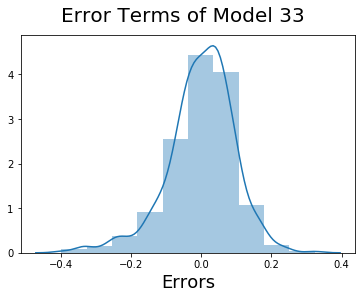

In [114]:
fig=plt.figure()
sns.distplot((y_train-y_train33_price), bins=10)
fig.suptitle('Error Terms of Model 33', fontsize=20)
plt.xlabel("Errors",fontsize=18)

## We can see that residual distribution is almost normal with mean 0. So it fulfills our normality assumption.

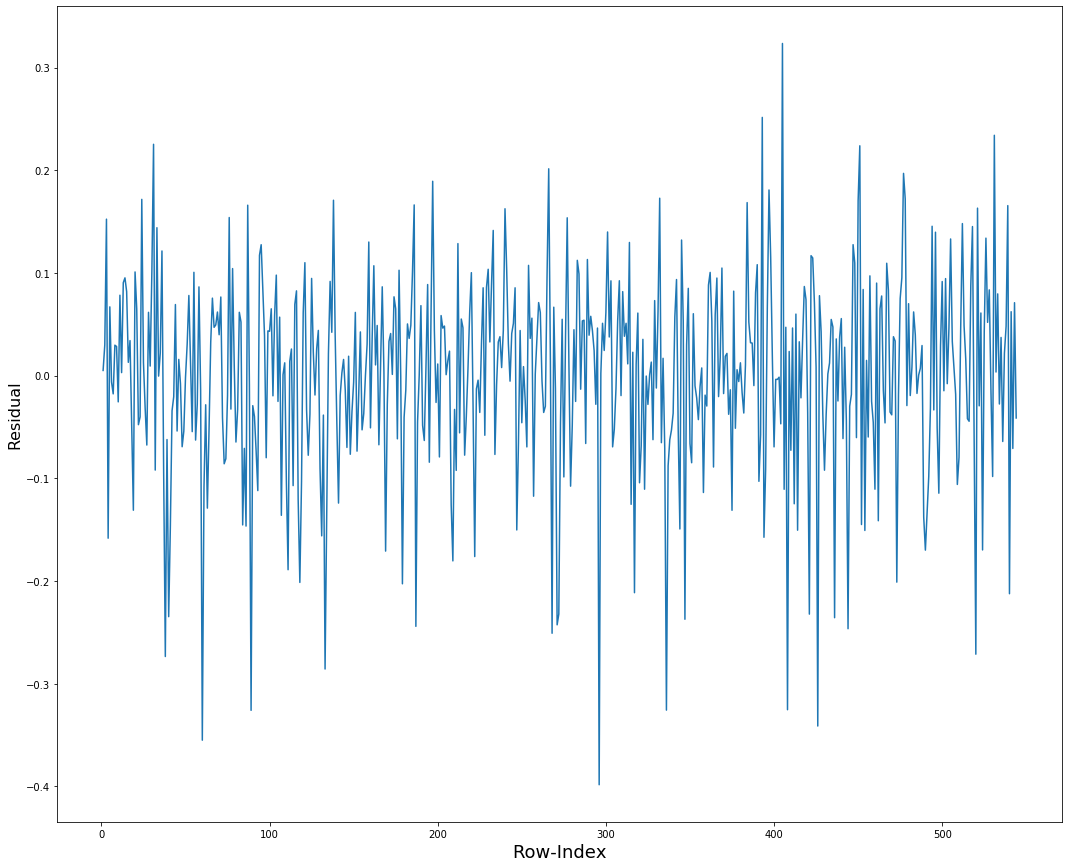

In [115]:
c = [i for i in range(1,545,1)]
plt.figure(figsize=(18,15))                   #we can see that the error terms follow no patterns and has no collinearity
plt.plot(c,y_train-y_train33_price)
fig.suptitle('Residual_in_train vs Row-index', fontsize=20)              # Plot heading 
plt.xlabel('Row-Index', fontsize=18)                               # X-label
plt.ylabel('Residual', fontsize=16)                               # Y-label
plt.show()

In [116]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(bike_derived_train.cnt, y_train33_price)
r_squared = r2_score(bike_derived_train.cnt, y_train33_price)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.00922604696282497
r_square_value : 0.8329807404645861


Text(0, 0.5, 'cnt')

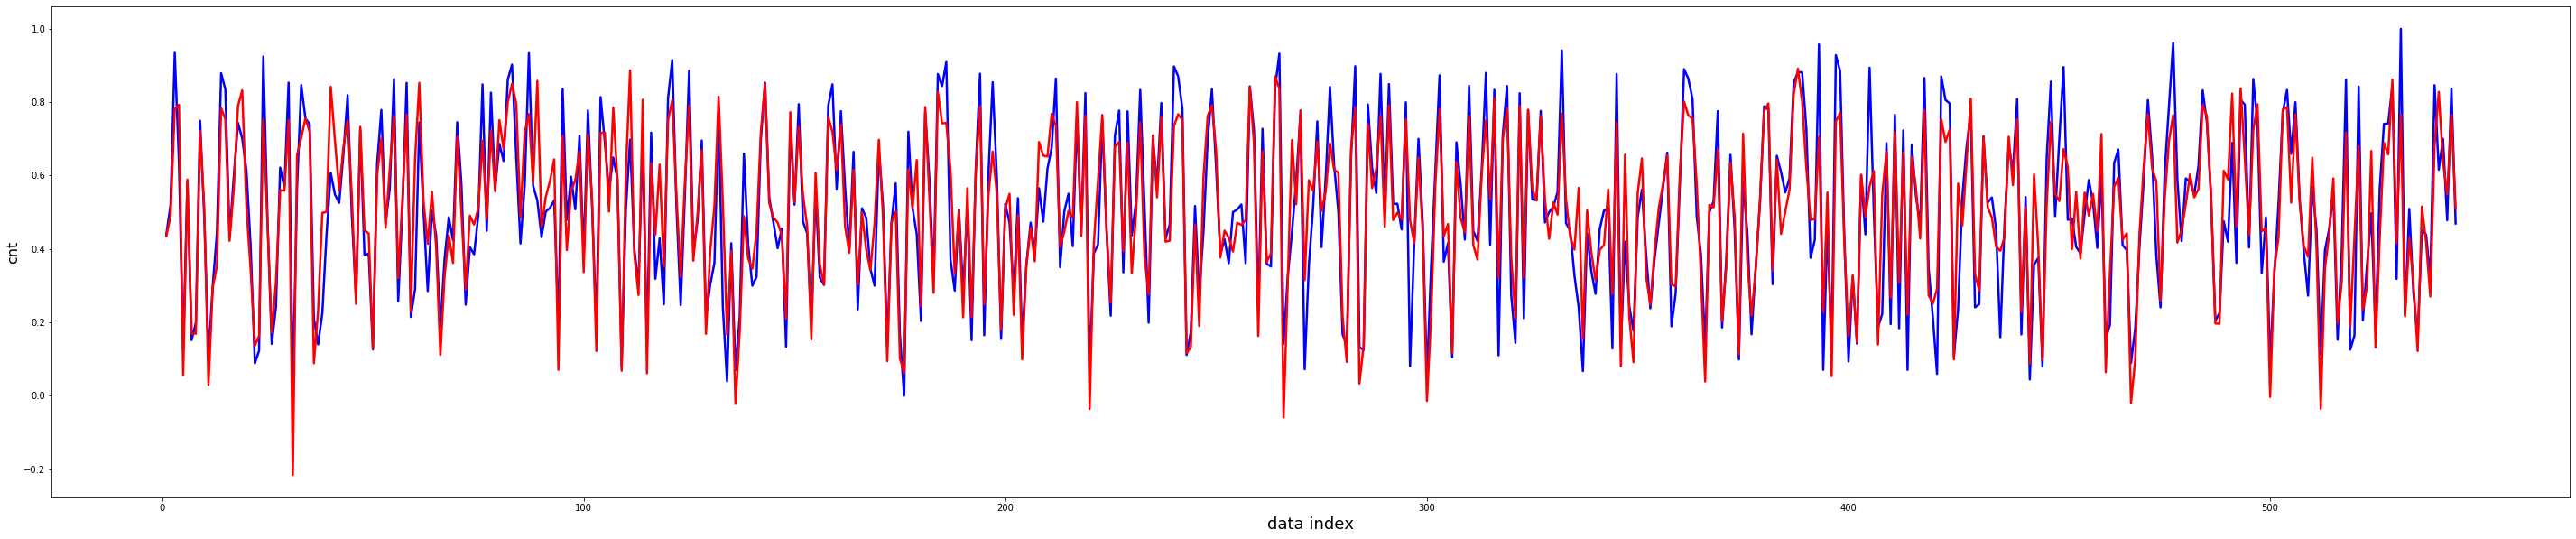

In [117]:
#Actual vs Predicted
c = [i for i in range(1,545,1)]
plt.figure(figsize=(50,10)) 
plt.plot(c,bike_derived_train.cnt, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train33_price, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted for Model 33', fontsize=20)              # Plot heading 
plt.xlabel('data index', fontsize=18)                               # X-label
plt.ylabel('cnt', fontsize=16)   

## We can see in the above graph actual price and prdicted price in the training data is not displaced w.r.t one another and follws the same pattern, the length of the red line covers 83.3% of the blue line as R2 score is 83.3% 

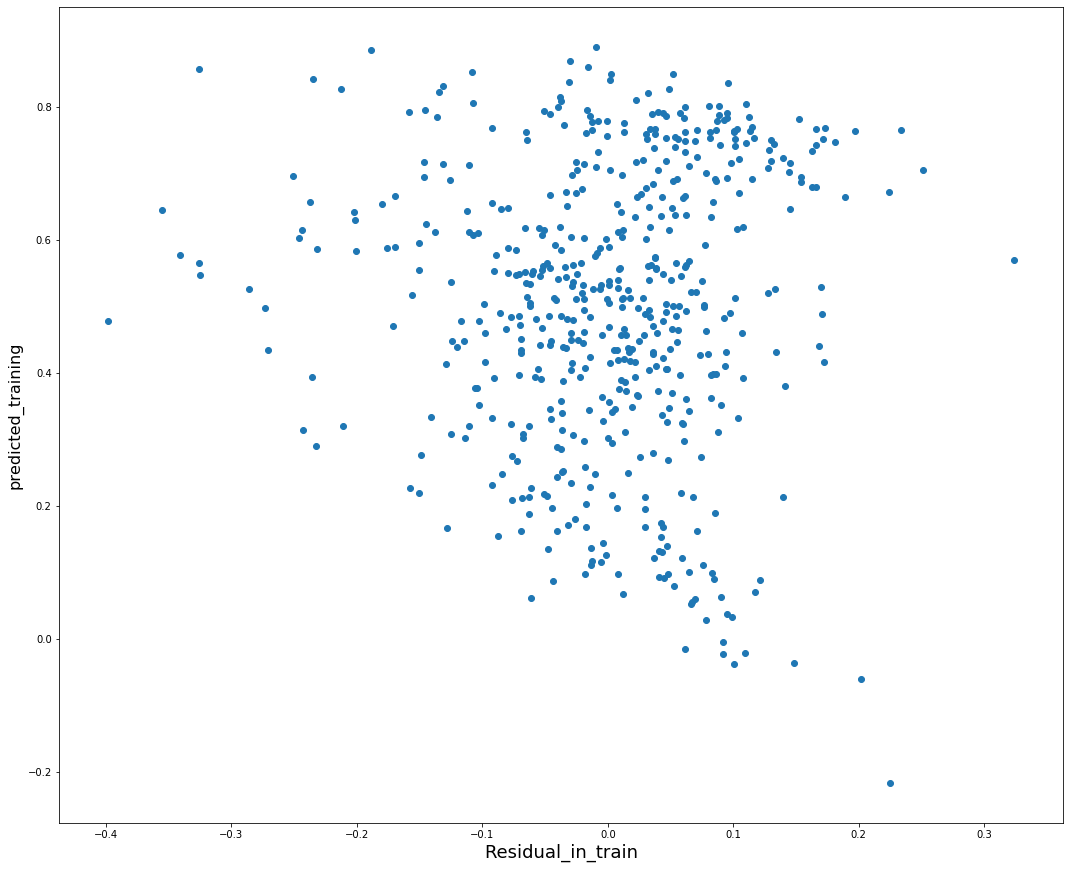

In [118]:
plt.figure(figsize=(18,15))                   #we can see that the error terms show a substantial degree of homoscedasticity
plt.scatter(y_train-y_train33_price,y_train33_price)
fig.suptitle('Residual_in_train vs predicted_training', fontsize=20)              # Plot heading 
plt.xlabel('Residual_in_train', fontsize=18)                               # X-label
plt.ylabel('predicted_training', fontsize=16)                               # Y-label
plt.show()

## Applying the LR model-33 on Test set

In [119]:
num_vars=["temp","windspeed","hum","cnt","hum/temp","log(windspeed)"]
bike_derived_test[num_vars]=scaler.transform(bike_derived_test[num_vars])
bike_derived_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,misty_and_cloudy,lightrains_lightsnow_thunderstorms_clouds,summer_season,fall_season,winter_season,monday,tuesday,wednesday,thursday,friday,saturday,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,hum/temp,log(windspeed)
453,1,0,1,0.348066,0.454756,0.239851,0.607026,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.240356,0.504321
548,1,0,1,0.892817,0.331206,0.210222,0.752022,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.026021,0.466129
17,0,0,1,0.144752,0.845708,0.261662,0.030424,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.789437,0.530398
64,0,0,0,0.356714,0.966257,0.753854,0.021007,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.456753,0.892662
709,1,0,1,0.325966,0.476798,0.635510,0.612097,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.267470,0.829526


In [120]:
bike_derived_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,misty_and_cloudy,lightrains_lightsnow_thunderstorms_clouds,summer_season,fall_season,winter_season,monday,tuesday,wednesday,thursday,friday,saturday,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,hum/temp,log(windspeed)
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.472527,0.038462,0.642857,0.492979,0.509371,0.386040,0.470131,0.313187,0.038462,0.236264,0.236264,0.263736,0.159341,0.170330,0.104396,0.137363,0.109890,0.153846,0.082418,0.076923,0.071429,0.093407,0.076923,0.093407,0.060440,0.065934,0.098901,0.065934,0.115385,0.239033,0.613811
std,0.500622,0.192838,0.480479,0.251595,0.209100,0.210328,0.221015,0.465069,0.192838,0.425958,0.425958,0.441874,0.367003,0.376959,0.306617,0.345179,0.313616,0.361797,0.275758,0.267204,0.258250,0.291804,0.267204,0.291804,0.238957,0.248851,0.299353,0.248851,0.320367,0.204171,0.195633
min,0.000000,0.000000,0.000000,-0.064136,-0.092227,-0.049874,0.001207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.020428,-0.271249
25%,0.000000,0.000000,0.000000,0.284807,0.350927,0.226989,0.327297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100477,0.488152
50%,0.000000,0.000000,1.000000,0.469061,0.493910,0.351208,0.489919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.188339,0.623343
75%,1.000000,0.000000,1.000000,0.722927,0.639356,0.493728,0.625770,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.322152,0.739036
max,1.000000,1.000000,1.000000,0.983425,0.997100,1.165056,0.980804,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.425357,1.059308


In [121]:
y_derived_test=bike_derived_test["cnt"]
X_derived_test=bike_derived_test[['yr','temp','holiday', 'windspeed',
        'lightrains_lightsnow_thunderstorms_clouds','misty_and_cloudy',
       'summer_season',  'winter_season','sep', 
             "hum/temp"]]

In [122]:
X_derived_test_lm=sm.add_constant(X_derived_test)
X_derived_test_lm.columns

Index(['const', 'yr', 'temp', 'holiday', 'windspeed',
       'lightrains_lightsnow_thunderstorms_clouds', 'misty_and_cloudy',
       'summer_season', 'winter_season', 'sep', 'hum/temp'],
      dtype='object')

In [123]:
y_pred_derived_test=lr33.predict(X_derived_test_lm)
y_pred_derived_test.head()

453    0.548329
548    0.822846
17    -0.026504
64     0.103938
709    0.537786
dtype: float64

In [124]:
res_derived_test=y_derived_test-y_pred_derived_test
res_derived_test.head()

453    0.058698
548   -0.070824
17     0.056928
64    -0.082931
709    0.074311
dtype: float64

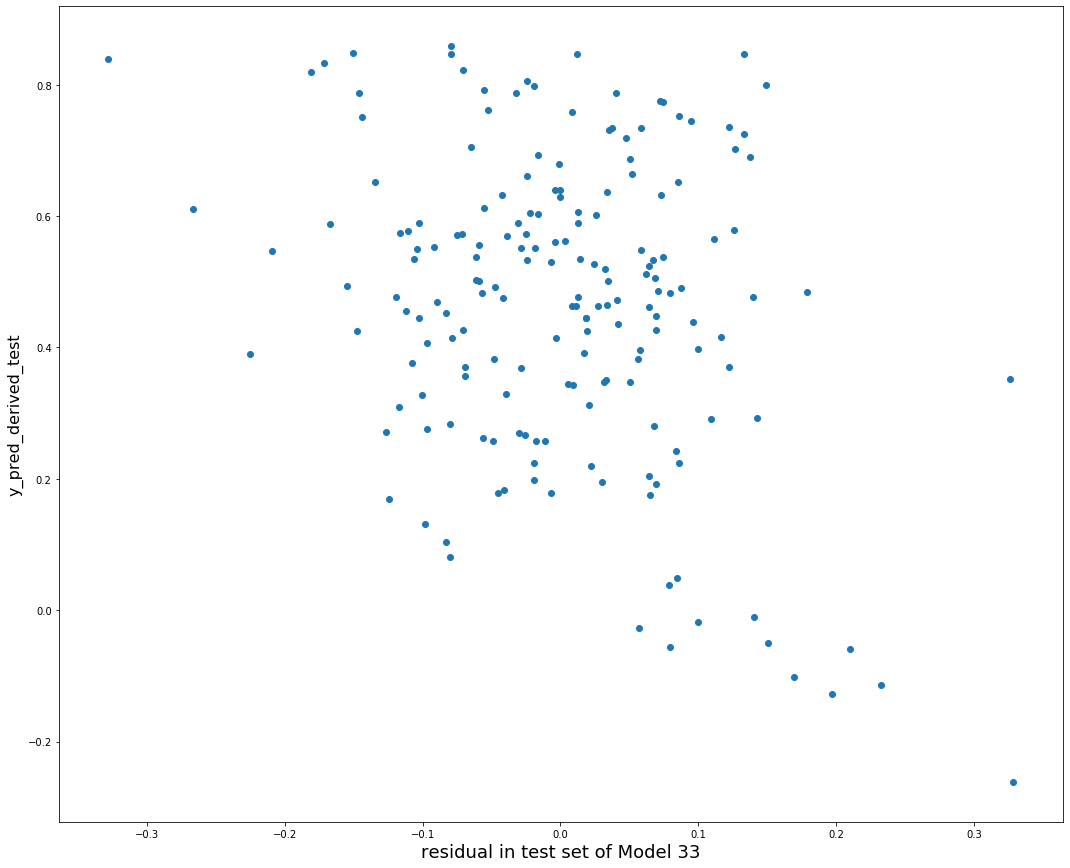

In [125]:
plt.figure(figsize=(18,15))                   # checking if there is any pattern in residual data or is it white noise.
plt.scatter(res_derived_test,y_pred_derived_test)
plt.xlabel('residual in test set of Model 33', fontsize=18)                               # X-label
plt.ylabel('y_pred_derived_test', fontsize=16)                               # Y-label
plt.show()

In [126]:
from sklearn.metrics import r2_score
r2_score(y_derived_test, y_pred_derived_test)

0.8042740769224994

# General Interpretation of Multi-Linear Regression Model based on Model-33 (based on 10 variables) and R2 score of 83.3% and all vif <5 


## Average Bike rental demand goes up by-
#### 0.25 units in 2019 compared to 2018.  ------ which is consistent with our data, as 2019 saw higher sales compared to 2018
#### 0.39 units with unit increase in temp..------ which is consistent with our data, as temp and cnt are positively related.
#### 0.07 units in Summer season compared to other seasons--------- which is consistent with our data, as spring saw the lowest demand and summer saw higher demand than spring. Hence coeff of spring season should be negative, every other season sd be positive.
#### 0.12 units in winter season compared to other seasons----as explained above.
#### 0.08 units in September month of the fall season-----sept falls in fall_season and fall season also saw higher demand

#### (The analysis of season wise rental demand is described in cell-12 and month wise rental demand in cell 14 and 15. It says that june saw the highest avg bike rental demand followed by sept. So in our equation sept has a positive coefficient, which is consistent with our data. But, if we put jun as a month in the equation then sept will be zeroand on an avg the cnt will be 0.08 units less than sept, which is not consistent with our data as jun saw the highest avg bike rental demand. 
#### However, such is not the case, because, our equation has summer_season and temp as a variable, which includes jun not sept in USA. So, in toto, the avg bike rental demand for June month will be the highest, consistent with our data)





## Average Bike rental demand goes down by-
#### 0.12 units for unit increase in windspeed ----which is consistent with our data, as windspeed is negatively corelated with bike rentals.
#### 0.13 units in holidays compared to non holidays----which is consistent with our data, as holidays see less demand for bike rentals.
#### 0.06 units in misty and cloudy conditions----which is consistent with our data.
#### 0.20 units in Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds weather situation compared to other weather situations-------which is consistent with our data,
#### 0.32 units for unit increase in humidity/temperature ratio. Therefore, decrease in humidity or increase in temperature will push the demand for bikes rentals higher.-----this is perfectly consistent with our data as higher humidity or lower temperature is an unconfortable situation to ride bikes and therefore,less demand.


# Solution with R2 score of 83.3% 

# Final Multi-Linear equation predicting scaled bike rental demand based on scaled numerical variables-

# cnt = 0.4  + 0.26 * (yr) + 0.39 * (temp) + 0.07 * (summer_season) +  0.12 * (winter_season) +  0.08 * (sep)  - 0.12 * (windspeed) - 0.13 * (holidays) - 0.06 * (misty_and_cloudy) - 0.20 * ( Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) - 0.32 * (humidity/temperature)

# The above equation presents a better story, the marketing team can look for growth drivers like working day, summer, fall, winter seasons and come out with promotional campaigns and discounts during high windspeed situation, misty, cloudy and snowy conditions.Also high humidity and low temperature days will require more promotional efforts from the company to drive bike rental demand. 

# Ideally, there should be a different model for 2019 and 2018, since there is a lot of variation in 2019 vs 2018. But in the present situation, we can deduce that 2019 has been a better year for the company 